---
### Perceptron and K-NN
---

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will work with a dataset about wines, which can be downloaded from pamplemousse. Be careful not to open the CSV file with Excel and save it afterward, as Excel may alter the file. We load it as a Pandas `DataFrame` and display its first five rows as follows:

In [109]:
data = pd.read_csv('data/wine_dataset.csv')
data.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Question 1.** — Examine the `DataFrame` data. How many examples and how many variables does the dataset contain?

In [110]:
print(f"Number of examples: {data.shape[0]}.")
print(f"Number of variables: {data.shape[1]}.")

Number of examples: 6497.
Number of variables: 13.


We aim to predict the type of wine (red or white) based on its chemical properties. The variable `quality` is not a chemical property but a subjective rating given by wine tasters; it is not relevant for our problem, so we will remove it. Pandas allows us to manipulate (in this case, delete) columns by referring to their names.

In [111]:
data = data.drop(columns=['quality'])

Before building predictors, we want to select a small number of explanatory variables (say four): those that seem most promising for predicting wine type. For example, for the variable `fixed_acidity`, we can visualize its distribution for each wine type as follows:

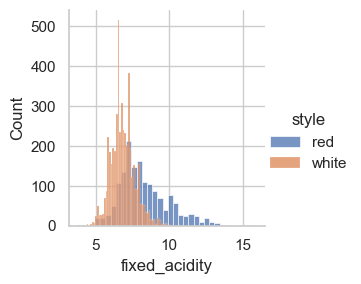

In [112]:
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.histplot, 'fixed_acidity').add_legend()
plt.show()

**Question 2.** — Produce a figure that contains the visualizations for each explanatory variable. You can use a `for` loop, as well as `data.columns`, which provides the list of variable names.

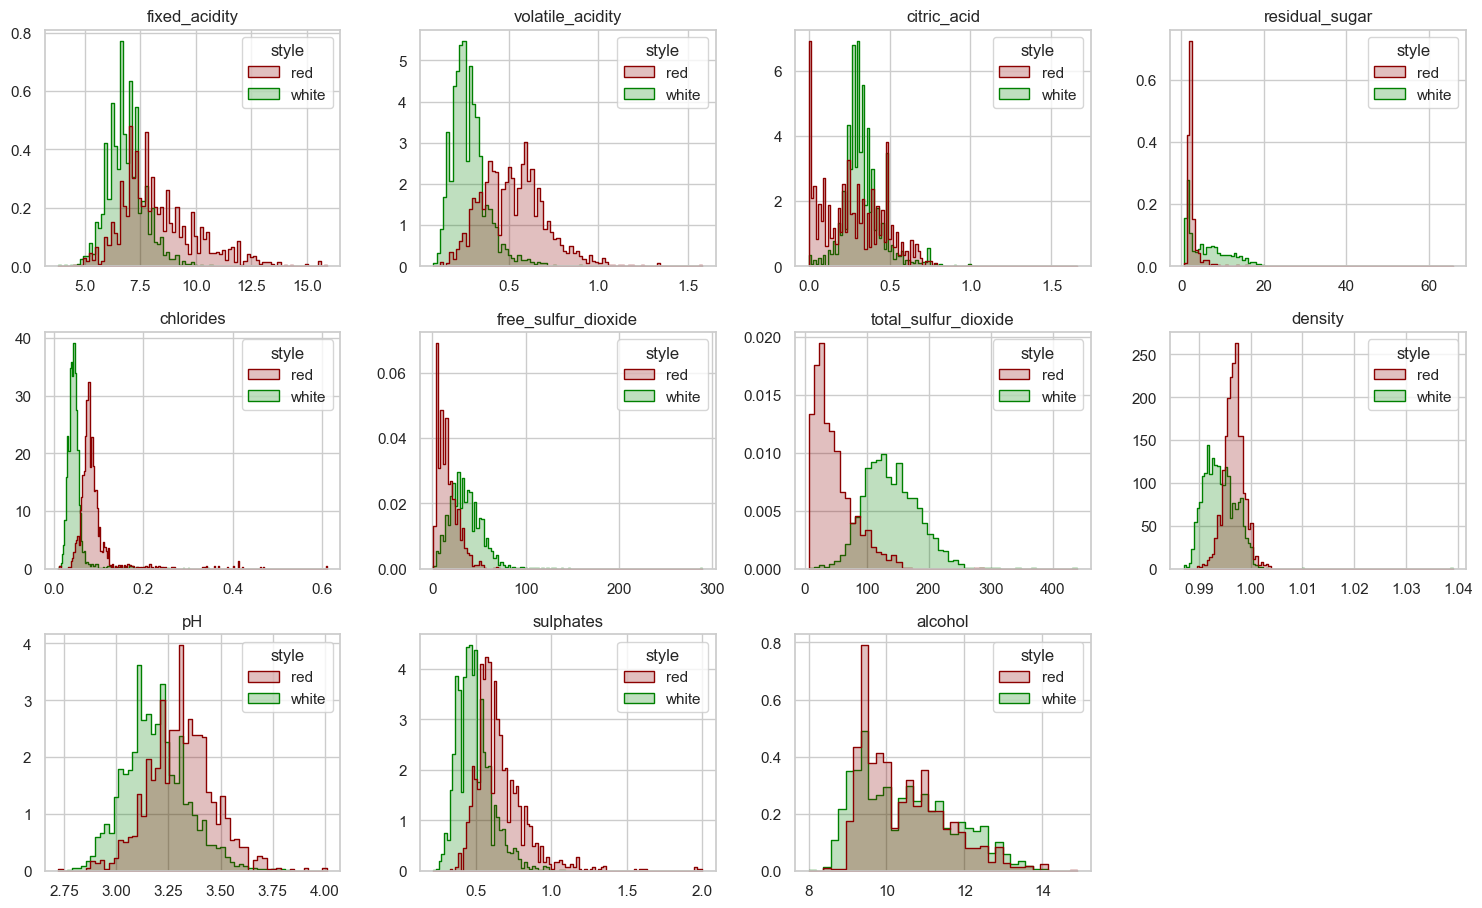

In [113]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Red for red wine, Green for white
custom_palette = {'red': 'darkred', 'white': 'green'}

# Loop over all explanatory variables (except style)
for i, col in enumerate(data.columns):
    if col != 'style':
        plt.subplot(4, 4, i + 1)
        sns.histplot(data=data, x=col, hue='style', palette=custom_palette,
                     element='step', stat='density', common_norm=False)
        plt.title(f"{col}")
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

**Question 3.** — Based on the generated figures, choose four variables that appear to be the most promising for predicting the type of wine. Create a `DataFrame` `data_reduced` containing only these selected variables as well as the target variable.

In [114]:
selected_vars = ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates']
# Worth to try also: fixed_acidity

data_reduced = data[selected_vars + ['style']]
data_reduced.head()

,volatile_acidity,chlorides,total_sulfur_dioxide,sulphates,style
0,0.70,0.076,34.0,0.56,red
1,0.88,0.098,67.0,0.68,red
2,0.76,0.092,54.0,0.65,red
3,0.28,0.075,60.0,0.58,red
4,0.70,0.076,34.0,0.56,red


We will now split the dataset into training and test samples. For this, we can use a dedicated function provided by `scikit-learn`, which also takes care of shuﬄing the order of the examples.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# Separate features and target
explanatory = data_reduced.drop(columns='style')
target      = data_reduced['style']

X_train, X_test, y_train, y_test = train_test_split(explanatory, target, random_state=87)

**Question 4.** — Observe the obtained samples and determine the ratio of their sizes.

In [117]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Test/Train size ratio: {len(X_test)/len(X_train):.4f}")

Training set size: 4872
Test set size: 1625
Test/Train size ratio: 0.3335


We will now train a logistic regression model.

**Question 5.** — Display the training and test errors of the constructed predictor. Remember to use the `f.score()` function.

We define:
$$
\begin{cases}
\text{train\_accuracy} = f.\text{score}(X_{\text{train}}, y_{\text{train}})\\
\text{test\_accuracy} = f.\text{score}(X_{\text{test}}, y_{\text{test}})
\end{cases}
$$

The **error rates** are then computed as the complement of the accuracies:
$$
\begin{cases}
\text{train\_error} = 1 - \text{train\_accuracy}\\
\text{test\_error} = 1 - \text{test\_accuracy}
\end{cases}
$$

*NB*: A lower error indicates a better fit to the corresponding dataset.

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
f = LogisticRegression()
f.fit(X_train, y_train)
print(f"Training error (LogReg): {1 - f.score(X_train, y_train):.4f}")
print(f"Test error (LogReg): {1 - f.score(X_test, y_test):.4f}")

Training error (LogReg): 0.0296
Test error (LogReg): 0.0363


**Question 6.** — Train a Perceptron predictor, as well as $k$-NN predictors (for diﬀerent values of $k$). Compare the results.

In [120]:
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [121]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print(f"Training error (Perceptron): {1 - perceptron.score(X_train, y_train):.4f}")
print(f"Test error (Perceptron): {1 - perceptron.score(X_test, y_test):.4f}")

Training error (Perceptron): 0.0823
Test error (Perceptron): 0.0960


In [122]:
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate accuracy and error
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    print(f"k = {k:02d}  →  Training error: {1 - knn.score(X_train, y_train):.4f}   |   Test error: {1 - knn.score(X_test, y_test):.4f}")

k = 01  →  Training error: 0.0004   |   Test error: 0.0400
k = 03  →  Training error: 0.0228   |   Test error: 0.0578
k = 05  →  Training error: 0.0343   |   Test error: 0.0603
k = 10  →  Training error: 0.0458   |   Test error: 0.0689


The Perceptron reaches 8.2% training error and 9.6% test error, showing decent but limited accuracy. The k-NN model performs best at $k = 1$, with near-perfect training accuracy and the **lowest test error (4%)**, indicating **strong generalization**, not overfitting. As $k$ increases, both errors rise slightly, reflecting the usual bias-variance trade-off. In this setting, $k = 1$ is the most effective, while the Perceptron remains a more stable alternative for noisier data.

**Question 7.** — Explain what the confusion matrix represents.

In [123]:
print("Confusion matrix (LogReg on test set):")
pd.crosstab(y_test, f.predict(X_test))

Confusion matrix (LogReg on test set):


col_0,red,white
style,,
red,383,41
white,18,1183


The confusion matrix summarizes the performance of the logistic regression classifier by showing the number of correct and incorrect predictions for each class (red and white wines). Each row represents the true class, and each column represents the predicted class. Here:

- The first row shows how red wines were classified:
  - 383 red wines were correctly classified as red.
  - 41 red wines were incorrectly classified as white.

- The second row shows how white wines were classified:
  - 1183 white wines were correctly classified as white.
  - 18 white wines were incorrectly classified as red.

**Question 8.** — From `X_test` and `y_test`, construct a test subsample `X_test_` and `y_test_` that contains an equal number of red and white wines. You may use the `resample` function, whose documentation you can consult, and which can be imported using the following command:

In [124]:
from sklearn.utils import resample

In [125]:
# Create a copy of the test set and add the target variable for easier manipulation
test_df = X_test.copy()
test_df['style'] = y_test

# Find the number of samples in the minority class (red or white, whichever is fewer)
min_class_size = y_test.value_counts().min()

# Randomly sample an equal number of red and white with a fixed random seed
reds = resample(test_df[test_df['style'] == 'red'], 
                replace=False, 
                n_samples=min_class_size, 
                random_state=87)

whites = resample(test_df[test_df['style'] == 'white'], 
                  replace=False, 
                  n_samples=min_class_size, 
                  random_state=87)

# Combine the two balanced subsets to form a new balanced test set
balanced_test_df = pd.concat([reds, whites])

# Separate features and labels for this balanced test set
X_test_ = balanced_test_df.drop(columns='style')
y_test_ = balanced_test_df['style']

**Question 9.** — Evaluate the performance of the constructed predictors on this subsample. Comment on the results.

In [126]:
print(f"Balanced test accuracy (  LogReg  ): {f.score(X_test_, y_test_):.4f}")
print(f"Balanced test accuracy (Perceptron): {perceptron.score(X_test_, y_test_):.4f}")

Balanced test accuracy (  LogReg  ): 0.9469
Balanced test accuracy (Perceptron): 0.8243


On the balanced test set, **Logistic Regression** achieves an accuracy of **94.7%**, while the **Perceptron** drops to **82.4%**. This confirms that Logistic Regression is significantly better at handling **both red and white wines** fairly. The Perceptron, by contrast, likely struggled more with one of the classes — its drop in performance suggests it's **less robust to class balance** and may have overfitted to the majority class in the original dataset. Overall, Logistic Regression generalizes better in a balanced setting.

**Question 10.** — Similarly, create a balanced training subsample `X_train_` and `y_train_`. Train the predictors on this subsample and observe their scores. Comment on the results.

In [127]:
# Create a balanced training set with equal numbers of red and white wines
train_df = X_train.copy()
train_df['style'] = y_train

# Determine how many samples to draw (based on minority class size)
min_class_size = y_train.value_counts().min()

# Randomly sample the same number of red and white wines
reds = resample(train_df[train_df['style'] == 'red'], replace=False, n_samples=min_class_size, random_state=87)
whites = resample(train_df[train_df['style'] == 'white'], replace=False, n_samples=min_class_size, random_state=87)

# Combine into a balanced training DataFrame
balanced_train_df = pd.concat([reds, whites])

# Separate features and target
X_train_ = balanced_train_df.drop(columns='style')
y_train_ = balanced_train_df['style']

# Train logistic regression on the balanced training set
f_bal = LogisticRegression(max_iter=1000)
f_bal.fit(X_train_, y_train_)

# Evaluate on balanced train and test sets
print(f"Balanced train accuracy (LogReg): {f_bal.score(X_train_, y_train_):.2f}")
print(f"Balanced test accuracy (LogReg): {f_bal.score(X_test_, y_test_):.2f}")

Balanced train accuracy (LogReg): 0.96
Balanced test accuracy (LogReg): 0.96


After training on a balanced dataset, Logistic Regression achieves **96% accuracy on both the balanced training and test sets**. This indicates that the model has learned to distinguish red and white wines **effectively and symmetrically**, without overfitting. The high and nearly identical accuracy on both sets suggests **good generalization** and **robustness to class imbalance**. Training on a balanced set helped the model better handle both classes equally, which may have been underrepresented or biased in the original training.

**Question 11.** — Train the estimators using the full set of initial explanatory variables. Comment on the results.

In [128]:
# Use all available features (no reduction to 4 variables)
X_full = data.drop(columns='style')
y_full = data['style']

# Split full data into train and test sets (80/20 split)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=87
)

# Train logistic regression on all features
f_full = LogisticRegression(max_iter=1000)
f_full.fit(X_train_full, y_train_full)

# Print training and test accuracy
print(f"Full-feature train accuracy (LogReg): {f_full.score(X_train_full, y_train_full):.2f}")
print(f"Full-feature test accuracy (LogReg): {f_full.score(X_test_full, y_test_full):.2f}")

Full-feature train accuracy (LogReg): 0.99
Full-feature test accuracy (LogReg): 0.98


With a training accuracy of **99%** and test accuracy of **98%**, Logistic Regression performs **exceptionally well** when using all available features. The very small gap between training and test accuracy suggests **minimal overfitting** and excellent generalization. This confirms that the additional chemical variables provide meaningful information for distinguishing red and white wines, and that the model can effectively learn from the full feature set without losing robustness. Overall, this is a strong indication that using all features yields the best performance in this classification task.